### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [1]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
x_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
x_train.max(): 255
x_train.min(): 0
x_test.max(): 255
x_test.min(): 0


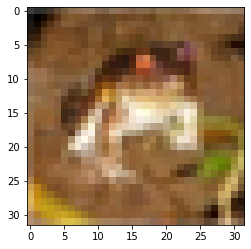

In [5]:
plt.imshow(x_train[0]);

In [6]:
x_train = rgb2gray(x_train)
x_test = rgb2gray(x_test)

# Esto no solo reduce la dimensionalidad de colores sino que también normaliza.

In [7]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('x_train.max():', x_train.max())
print('x_train.min():', x_train.min())
print('x_test.max():', x_test.max())
print('x_test.min():', x_test.min())

x_train.shape: (50000, 32, 32)
x_test.shape: (10000, 32, 32)
x_train.max(): 1.0
x_train.min(): 0.0
x_test.max(): 1.0
x_test.min(): 0.0


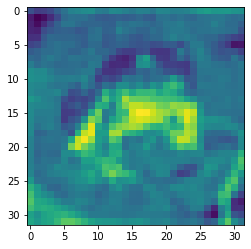

In [8]:
plt.imshow(x_train[0]);

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


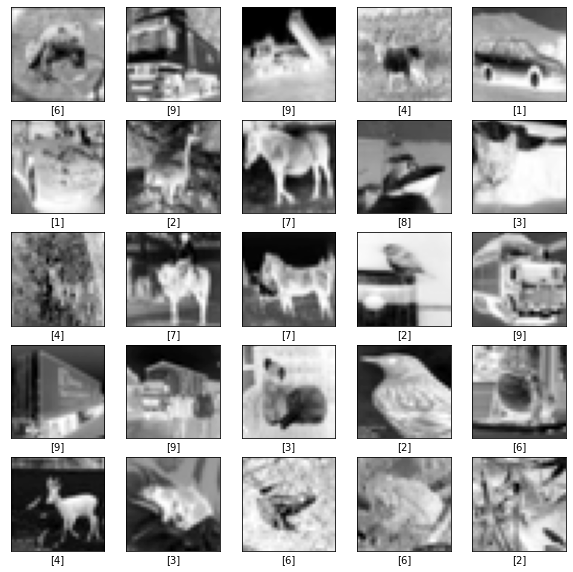

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show();

In [10]:
x_train[0].shape

(32, 32)

In [11]:
print('x_train.shape:', x_train.shape)

x_train.shape: (50000, 32, 32)


In [12]:
x_train[0]

array([[0.24092   , 0.17760941, 0.18848824, ..., 0.53252784, 0.50619294,
        0.50033686],
       [0.07509804, 0.        , 0.03744392, ..., 0.36493412, 0.34615961,
        0.36186078],
       [0.09410275, 0.03297176, 0.11884353, ..., 0.34813176, 0.34979843,
        0.30750941],
       ...,
       [0.6774102 , 0.60635333, 0.62403529, ..., 0.52625569, 0.13561608,
        0.14520824],
       [0.56710667, 0.50111725, 0.56747294, ..., 0.59512392, 0.26438706,
        0.22747098],
       [0.58428902, 0.52848627, 0.5721451 , ..., 0.73579451, 0.48063176,
        0.38096275]])

In [13]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(32,32,1)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

In [14]:
model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
x_train = x_train.reshape(50000, 32, 32, 1)
print('x_train.shape:', x_train.shape)
x_test = x_test.reshape(10000, 32, 32, 1)
print('x_test.shape:', x_test.shape)

x_train.shape: (50000, 32, 32, 1)
x_test.shape: (10000, 32, 32, 1)


In [16]:
model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8135 - accuracy: 0.3626
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5859 - accuracy: 0.4535
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5136 - accuracy: 0.4813
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4784 - accuracy: 0.4921
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4541 - accuracy: 0.5032
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4293 - accuracy: 0.5094
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4190 - accuracy: 0.5117
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4064 - accuracy: 0.5188
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3967 - accuracy: 0.5199
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [17]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.3687 - accuracy: 0.5291


---
# Modelo 2

In [18]:
model2 = models.Sequential()

model2.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(32,32,1)))
model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(16))
model2.add(layers.Dense(32))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [19]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8321 - accuracy: 0.3493
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6273 - accuracy: 0.4367
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5442 - accuracy: 0.4654
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5053 - accuracy: 0.4800
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4732 - accuracy: 0.4907
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4603 - accuracy: 0.4937
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4445 - accuracy: 0.5059
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4303 - accuracy: 0.5068
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4141 - accuracy: 0.5117
Epoch 10/10
1563/1563 [==============================] - 16s 10ms/step - 

In [21]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - loss: 1.4191 - accuracy: 0.5141


## Evaluación de los modelos

In [24]:
test_loss1, test_acc1 = model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.3687 - accuracy: 0.5291


In [25]:
test_loss2, test_acc2 = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 1.4191 - accuracy: 0.5141


## Predicciones

In [26]:
predictions1 = model1.predict(x_test)

In [27]:
predictions2 = model2.predict(x_test)

In [28]:
predictions1[0]

array([0.08316449, 0.01169673, 0.0256889 , 0.21010596, 0.03077584,
       0.07114127, 0.21711351, 0.14197771, 0.12109361, 0.0872419 ],
      dtype=float32)

In [29]:
predictions2[0]

array([0.02177077, 0.00821412, 0.01625559, 0.3751476 , 0.04910384,
       0.08887805, 0.08218557, 0.10454058, 0.07990542, 0.17399837],
      dtype=float32)

In [30]:
y_test[0]

array([3], dtype=uint8)